# DQN Reinforcement Learning in Atari Games

## Introduction
A DQN, or Deep Q-Network, approximates a state-value function in a Q-Learning framework with a neural network. In the Atari Games case, they take in several frames of the game as an input and output state values for each action as an output.

It is usually used in conjunction with Experience Replay, for storing the episode steps in memory for off-policy learning, where samples are drawn from the replay memory at random. Additionally, the Q-Network is usually optimized towards a frozen target network that is periodically updated with the latest weights every k steps (where k is a hyperparameter). The latter makes training more stable by preventing short-term oscillations from a moving target. The former tackles autocorrelation that would occur from on-line learning, and having a replay memory makes the problem more like a supervised learning problem.



https://paperswithcode.com/method/dqn

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os.path as osp

SRC_SUBDIR = '../src/'
SRC_SUBDIR = osp.abspath(SRC_SUBDIR)
if SRC_SUBDIR not in sys.path:
    print(f'Adding source directory to the sys.path: {SRC_SUBDIR!r}')
    sys.path.insert(1, SRC_SUBDIR)
    

from config.config import *
from features.get_env_features import get_env_features
%matplotlib inline 
from features.transforms import Transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from dqn_agent import DQAgent

Adding source directory to the sys.path: 'c:\\Users\\enric\\Documents\\GitHub\\machine_learning_exam\\src'


## The Game
**Breakout** is a classic arcade video game that was first released by Atari in 1976. It is a simple yet challenging game that has become a popular choice for testing and developing reinforcement learning algorithms. The game's objective is to break a wall of bricks using a paddle and ball, which bounces off the walls and obstacles.

![The Game](../reports/figures/game_frame.png "The Game")

### Objective
The primary objective of the Breakout game is to clear the screen of all the bricks. Players control a paddle located at the bottom of the screen, which can be moved left and right. A ball is launched from the paddle, and it bounces around the screen, colliding with bricks. The player must move the paddle to ensure that the ball doesn't fall off the screen. When the ball strikes a brick, the brick disappears, and the player scores points. The game continues until all the bricks are removed or the player loses all their lives.

### Complexity
While the concept of the Breakout game is straightforward, it presents several challenges for AI agents, particularly when using reinforcement learning. These challenges include:
 - **High-Dimensional State Space**: The game is typically played using pixel-based graphics, resulting in a high-dimensional state space that the AI agent must interpret. This makes learning an optimal policy more challenging.
 - **Sparse Rewards**: The rewards in Breakout are sparse, as they are primarily obtained by breaking bricks. It can take a significant number of actions to achieve a meaningful reward signal.
 - **Exploration vs. Exploitation**: Agents must strike a balance between exploring different actions to discover the best strategy and exploiting actions that have yielded positive results.
 - **Temporal Credit Assignment**: Determining which actions contributed to a successful or unsuccessful outcome is challenging due to the delayed nature of rewards in the game.

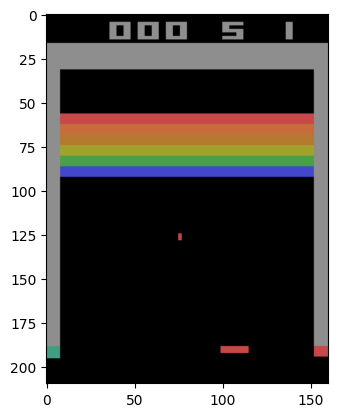

: 

In [3]:
env,state_space,n_actions = get_env_features(ENV_NAME)
env.reset()
obs = env.step(1)[0]

plt.imshow(obs)
plt.show()

## DQN Algorithm
**Deep Q-Network (DQN)** is a deep reinforcement learning algorithm that combines neural networks with Q-learning to enable agents to make decisions in complex and high-dimensional environments. It was introduced by Volodymyr Mnih et al. in their 2015 paper "Human-level control through deep reinforcement learning."

### Components of the DQN Algorithm
- **Q-Network**: The core of the DQN is a neural network, often a deep convolutional neural network (CNN). This network is responsible for approximating the Q-function, denoted as Q(s, a), which estimates the expected cumulative reward of taking action 'a' in state 's'. The Q-network takes the current state as input and outputs Q-values for all possible actions.
- **Experience Replay**: DQN uses an experience replay buffer, which is a storage of past experiences (state, action, reward, next state). This buffer helps in breaking the temporal correlation of sequential experiences, making training more stable. During training, random batches of experiences are sampled from the replay buffer for updates.
- **Target Network**: To stabilize training, DQN employs two networks: the primary Q-network and a target network. The target network is a copy of the Q-network but with frozen parameters. The Q-network is periodically synchronized with the target network. This technique helps prevent the target Q-values from "moving" during training, improving stability.

### Q-Learning Update Equation
The core of the DQN algorithm is the Q-learning update equation, which is used to iteratively update the Q-values. It is based on the temporal difference (TD) error:

$$ Q(s, a) = Q(s, a) + \alpha * [r + \gamma * max(Q(s', a')) - Q(s, a)] $$

- $Q(s, a)$ is the Q-value for taking action $a$ in state $s$.
- $\alpha$ is the learning rate, determining the step size for the updates.
- $r$ is the immediate reward obtained after taking action $a$ in state $s$.
- $\gamma$ is the discount factor, which weighs future rewards.
- $max(Q(s', a'))$ represents the maximum Q-value for the next state $s$ considering all possible actions $a$.

### Training
 - **Initialization**: The Q-network and the target network are initialized with random weights. The experience replay buffer is also initialized.
 - **Exploration vs. Exploitation**: During training, the agent must balance exploration (trying new actions) and exploitation (choosing the best-known actions). This balance is often achieved using an ε-greedy policy, where the agent selects the best-known action with probability 1-ε and explores with probability ε.
 - **Experience Collection**: The agent interacts with the environment, collecting experiences in the form of (state, action, reward, next state).
 - **Experience Replay**: Periodically, a random batch of experiences is sampled from the replay buffer, and the Q-network is updated using the Q-learning update equation.
 - **Target Network Update**: The target network is updated to match the Q-network periodically to stabilize training.
 - **Convergence**: Training continues until the Q-values start converging towards the optimal values.

## Project Implementation

### Gym Implementation
Explain the steps taken to implement the DQN algorithm for the Breakout game in Gymnasium.

### Preprocessing
Discuss the preprocessing of game frames, including image resizing and color channel conversion.

### The Network
Describe the neural network architecture used in the Q-network and the target network.


Provide details on how experience replay is employed to stabilize training.

In [ ]:
env.reset()
obs = env.step(1)[0]
obs_ = env.step(3)[0]

# setting values to rows and column variables
rows = 1
columns = 4
fig, axs = plt.subplots(rows, columns, constrained_layout=True)

axs[0].set_title('Frame 1')
axs[0].imshow(obs)
axs[0].axis('off')

axs[1].set_title('Frame 2')
axs[1].imshow(obs_)
axs[1].axis('off')

arrow = mpimg.imread('../reports/figures/arrow.png')
axs[2].imshow(arrow)
axs[2].axis('off')

# Preprocess state
state = Transforms.to_gray(obs,obs_)
axs[3].set_title('Preprocess')
axs[3].imshow(state[0], cmap='gray',  vmin=-0.5, vmax=0.5 )
axs[3].axis('off')


plt.savefig(f'../reports/figures/preprocess.png')
plt.show()


# Training

In [2]:
env,state_space,n_actions = get_env_features(ENV_NAME,max_episode_steps=2500)

models = [
    'no_exp',
	'breakout_model_50000',
	'breakout_model_75000',
	'breakout_model_99500']

for model in models:
	agent = DQAgent(replace_target_cnt=1, env=env, state_space=state_space, action_space=n_actions, model_name=model, gamma=GAMMA,eps_strt=EPS_START, eps_end=EPS_END, eps_dec=EPS_DECAY, batch_size=BATCH_SIZE, lr=LR)
	agent.play_games(num_eps=1,render=True)

[Errno 2] No such file or directory: '../models/BreakoutDeterministic/no_exp.pth'
Target network replaced


c:\Users\enric\Documents\GitHub\machine_learning_exam\.venv\lib\site-packages\gymnasium\utils\passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Episode 0/1: 
	Score: 0.0
	Avg score (past 100): 0.0				
	Epsilon: 0.9
	Steps made: 2500
loaded pretrained model breakout_model_50000
Target network replaced
Episode 0/1: 
	Score: 4.0
	Avg score (past 100): 4.0				
	Epsilon: 0.9
	Steps made: 243
loaded pretrained model breakout_model_75000
Target network replaced
Episode 0/1: 
	Score: 50.0
	Avg score (past 100): 50.0				
	Epsilon: 0.9
	Steps made: 1158
loaded pretrained model breakout_model_99500
Target network replaced
Episode 0/1: 
	Score: 115.0
	Avg score (past 100): 115.0				
	Epsilon: 0.9
	Steps made: 1474


: 